In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import glob
import pandas as pd
import numpy as np
from sglm.helpers import filehelpers as fh, dfhelpers as dfh
from pathlib import Path

In [4]:
# base_location = Path(r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs')
base_location = Path(r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs-old')

# load_folder = base_location / Path(r'Figure_1_2')
# h5_beta_locations = str((load_folder / Path(r'all\f1*-ft\coefs\*_best_coeffs.h5')).resolve())

# load_folder = base_location / Path(r'Figure_1_2')
# h5_beta_locations = str((load_folder / Path(r'all\f1*-ft\coefs\*_best_coeffs.h5')).resolve())
# load_folder = base_location / Path(r'Figure_3')
# h5_beta_locations = str((load_folder / Path(r'all\f3*-ft\coefs\*_best_coeffs.h5')).resolve())
# load_folder = base_location / Path(r'Figure_4_g1')
# h5_beta_locations = str((load_folder / Path(r'all\f4*-ft\coefs\*_best_coeffs.h5')).resolve())
# load_folder = base_location / Path(r'Figure_4_g2')
# h5_beta_locations = str((load_folder / Path(r'all\f4*-ft\coefs\*_best_coeffs.h5')).resolve())
# load_folder = base_location / Path(r'Figure_5_g1')
# h5_beta_locations = str((load_folder / Path(r'all\f5*-ft\coefs\*_best_coeffs.h5')).resolve())
# load_folder = base_location / Path(r'Figure_5_g2')
# h5_beta_locations = str((load_folder / Path(r'all\f5*-ft\coefs\*_best_coeffs.h5')).resolve())
# load_folder = base_location / Path(r'Figure_5_g5')
# h5_beta_locations = str((load_folder / Path(r'all\f5*-ft\coefs\*_best_coeffs.h5')).resolve())

# out_folder = base_location / Path(r'final_outputs_rev')
# out_folder_fig = base_location / Path(r'final_outputs_rev_fig')

load_folder = base_location / Path(r'Figure_7_g1--20_20sft')
h5_beta_locations = str((load_folder / Path(r'all/tet*/coefs/*_best_coeffs.h5')).resolve())


# out_folder = base_location / Path(r'final_outputs_rev_hps-wds3')
out_folder = base_location / Path(r'final_outputs_old')

# h5_beta_locations = Path('/Users/josh/Dropbox (HMS)/jz/Tetanus/1194_1195_1214_1258_1259_2_best_coeffs.h5')
out_loc = str((out_folder).resolve())
h5_beta_locations = glob.glob(h5_beta_locations)

In [5]:
h5_lst = []
for h5_coef_fn in h5_beta_locations:
    h5f = pd.HDFStore(h5_coef_fn)
    h5fk = h5f.keys()
    for key in h5fk:
        h5_df = pd.read_hdf(h5f, key).reset_index()
        
        key =  key.replace('5_base_words_gDA_to_gACH', '5_base_words_rDA_to_gACH')
        print(key)
        
        h5_df['fn'] = h5_coef_fn
        h5_df['key'] = key
        h5_df['name'] = h5_df['key'].str.replace('/', '').apply(lambda x: '_'.join(x.split('\\')[-1].split('_')[3:-4]))
        h5_df = h5_df.set_index(['fn','key'])
        
        
        h5_df = h5_df.sort_values('channel_name')
        h5_df['channel'] = h5_df['channel_name'].str.split('_').apply(lambda x: x[0])
        h5_df['run_num'] = h5_df['channel_name'].str.split('_').apply(lambda x: x[-1])
        
        h5_lst.append(h5_df)
concat = pd.concat(h5_lst, axis=0)

/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__0
/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__1
/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__2
/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__3
/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__4
/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__5
/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__6
/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__7
/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__8
/gDA_ctrl_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__9


In [6]:
h5_df

,,level_0,mouse_id,channel_name,name,timestamp,mse_tr,mse_cv,mse_te,r2_tr,r2_cv,...,AA_cnt_ho,Aa_cnt_ho,aA_cnt_ho,aa_cnt_ho,AB_cnt_ho,Ab_cnt_ho,aB_cnt_ho,ab_cnt_ho,channel,run_num
fn,key,,,,,,,,,,,,,,,,,,,,,
C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs-old\Figure_7_g1--20_20sft\all\tet_run_20230328--20_20sft_1-ft\coefs\732_735_736_776_1_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_best_coeffs.h5,/gDA_tet_1_1_base_words_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__9,732_735_736_776_1,732_735_736_776,gDA_tet_1_run_num=9,1_base_words_max_iter10000__fit_interceptFalse...,933.2286808490753 s,0.705428,0.714219,0.721836,0.273633,0.264991,...,0.526187,0.087561,0.057283,0.113748,0.009002,0.06874,0.100655,0.036825,gDA,num=9


In [7]:
fh.create_folder_if_not_exists(out_loc)

In [8]:
base_keys = list({
                # 'gACH':(0,0),
                # 'rDA':(0,0),
                # 'gDA':(0,0),
                'photometryCenterInIndex':(0,0),
                'photometryCenterOutIndex':(0,0),
                'photometrySideInIndex':(0,0),
                'photometrySideInIndexr':(0,0),
                'photometrySideOutIndex':(0,0),
                'sl': (0,0),
                'spnnrOff': (0,0),
                'photometryCenterInIndex':(0,0),
                'photometryCenterOutIndex':(0,0),
                'photometrySideInIndexAA':(0,0),
                'photometrySideInIndexAa':(0,0),
                'photometrySideInIndexaA':(0,0),
                'photometrySideInIndexaa':(0,0),
                'photometrySideInIndexAB':(0,0),
                'photometrySideInIndexAb':(0,0),
                'photometrySideInIndexaB':(0,0),
                'photometrySideInIndexab':(0,0),
                'photometrySideOutIndex':(0,0),
                'sl': (0,0),
                'spnnrOff': (0,0),
                }.keys())
# base_keys

In [9]:
concat = concat.reset_index()

In [10]:
import matplotlib.pyplot as plt

In [11]:
# concat['mod'] = concat.reset_index()['key'].apply(lambda x: '_'.join(x.split('\\')[-1].split('_')[0:3]).replace('/',''))
# concat['modl'] = concat.reset_index()['key'].apply(lambda x: '_'.join(x.split('\\')[-1].split('_')[3:-4]).replace('/',''))
# concat['ycol'] = concat['mod'].apply(lambda x: (x.split('_')[0]).replace('/',''))
# concat['rn'] = concat['key'].apply(lambda x: '_'.join(x.split('_')[-1]))


# vw = concat.set_index(['ycol', 'modl', 'rn'])[['mse_tr', 'mse_cv', 'mse_te']]

# for l in vw.reset_index()['ycol'].unique():
    
#     fig, ax = plt.subplots(1,1,figsize=(15,5))
    
#     fig.suptitle(l)
#     fig.set_facecolor('w')
    
#     vwyc = vw.loc[l].values
#     ymn, ymx = np.min(vwyc), np.max(vwyc)
#     vw.loc[l].unstack(0).swaplevel(0,1,axis=1).sort_index(axis=1).swaplevel(0,1,axis=1).boxplot(ax=ax)
#     plt.xticks(rotation=90)
# vw

In [12]:
# vw.loc[l, 'mse_tr'].unstack(0).boxplot()

In [13]:
# vw.loc[l, ['mse_tr']]

In [14]:
# vw

In [15]:
save_mse_scatter = concat.reset_index().set_index(['mouse_id', 'channel', 'name', 'run_num'])[['mse_tr', 'mse_cv', 'mse_te']]
save_mse_scatter.to_csv(str((Path(out_loc) / f'{load_folder.parts[-1]}-mse_sctr.csv').resolve()))

save_r2_scatter = concat.reset_index().set_index(['mouse_id', 'channel', 'name', 'run_num'])[['r2_tr', 'r2_cv', 'r2_te']]
save_r2_scatter.to_csv(str((Path(out_loc) / f'{load_folder.parts[-1]}-r2_sctr.csv').resolve()))

In [16]:
agg = concat.drop(['channel_name', 'timestamp', 'run_num'], axis=1).groupby(['channel', 'name']).agg([np.size, np.mean, np.std])
stk = agg[['mse_tr', 'mse_cv', 'mse_te']].rename({'mse_tr':'01_mse_tr', 'mse_cv':'02_mse_cv', 'mse_te':'03_mse_te'}, axis=1).swaplevel(axis=1).stack()

C:\Users\Josh\AppData\Local\Temp\ipykernel_24700\995889199.py:1: FutureWarning: ['fn', 'key'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg = concat.drop(['channel_name', 'timestamp', 'run_num'], axis=1).groupby(['channel', 'name']).agg([np.size, np.mean, np.std])


In [17]:
# concat[['mse_tr', 'mse_cv', 'mse_te']].unstack(0).boxplot()

In [18]:
stk['lb'] = stk['mean'] - 1.96*stk['std']/np.sqrt(stk['size'])
stk['mn'] = stk['mean']
stk['ub'] = stk['mean'] + 1.96*stk['std']/np.sqrt(stk['size'])

plt_df = stk[['lb', 'mn', 'ub']].unstack().swaplevel(axis=1)

gACH = plt_df.loc['gACH'] if 'gACH' in plt_df.reset_index()['channel'].unique() else plt_df.iloc[0:0]
rDA = plt_df.loc['rDA'] if 'rDA' in plt_df.reset_index()['channel'].unique() else plt_df.iloc[0:0]
gDA = plt_df.loc['gDA'] if 'gDA' in plt_df.reset_index()['channel'].unique() else plt_df.iloc[0:0]

save_ci = stk[['mean', 'size', 'std']].unstack().swaplevel(axis=1).sort_index(axis=1)
save_ci.to_csv(str((Path(out_loc) / f'{load_folder.parts[-1]}-mse_ci.csv').resolve()))

In [19]:
stk

mean  \
channel name                                                                     
gDA     0_base_simple_max_iter10000__fit_interceptFalse... 01_mse_tr  0.747809   
                                                           02_mse_cv  0.751330   
                                                           03_mse_te  0.748447   
        1_base_words_max_iter10000__fit_interceptFalse_... 01_mse_tr  0.735898   
                                                           02_mse_cv  0.744651   
                                                           03_mse_te  0.740994   

                                                                      size  \
channel name                                                                 
gDA     0_base_simple_max_iter10000__fit_interceptFalse... 01_mse_tr    20   
                                                           02_mse_cv    20   
                                                           03_mse_te    20   
        1_base_words_max_iter10000__fit_interceptFalse_... 01_mse_tr    20   
                                                           02_mse_cv    20   
                                                           03_mse_te    20   

                                                                           std  \
channel name                                                                     
gDA     0_base_simple_max_iter10000__fit_interceptFalse... 01_mse_tr  0.025092   
                                                           02_mse_cv  0.027295   
                                                           03_mse_te  0.024968   
        1_base_words_max_iter10000__fit_interceptFalse_... 01_mse_tr  0.026481   
                                                           02_mse_cv  0.025267   
                                                           03_mse_te  0.026028   

                                                                            lb  \
channel name                                                                     
gDA     0_base_simple_max_iter10000__fit_interceptFalse... 01_mse_tr  0.736812   
                                                           02_mse_cv  0.739368   
                                                           03_mse_te  0.737504   
        1_base_words_max_iter10000__fit_interceptFalse_... 01_mse_tr  0.724292   
                                                           02_mse_cv  0.733577   
                                                           03_mse_te  0.729586   

                                                                            mn  \
channel name                                                                     
gDA     0_base_simple_max_iter10000__fit_interceptFalse... 01_mse_tr  0.747809   
                                                           02_mse_cv  0.751330   
                                                           03_mse_te  0.748447   
        1_base_words_max_iter10000__fit_interceptFalse_... 01_mse_tr  0.735898   
                                                           02_mse_cv  0.744651   
                                                           03_mse_te  0.740994   

                                                                            ub  
channel name                                                                    
gDA     0_base_simple_max_iter10000__fit_interceptFalse... 01_mse_tr  0.758806  
                                                           02_mse_cv  0.763293  
                                                           03_mse_te  0.759389  
        1_base_words_max_iter10000__fit_interceptFalse_... 01_mse_tr  0.747504  
                                                           02_mse_cv  0.755725  
                                                           03_mse_te  0.752401

In [20]:
import matplotlib.pyplot as plt

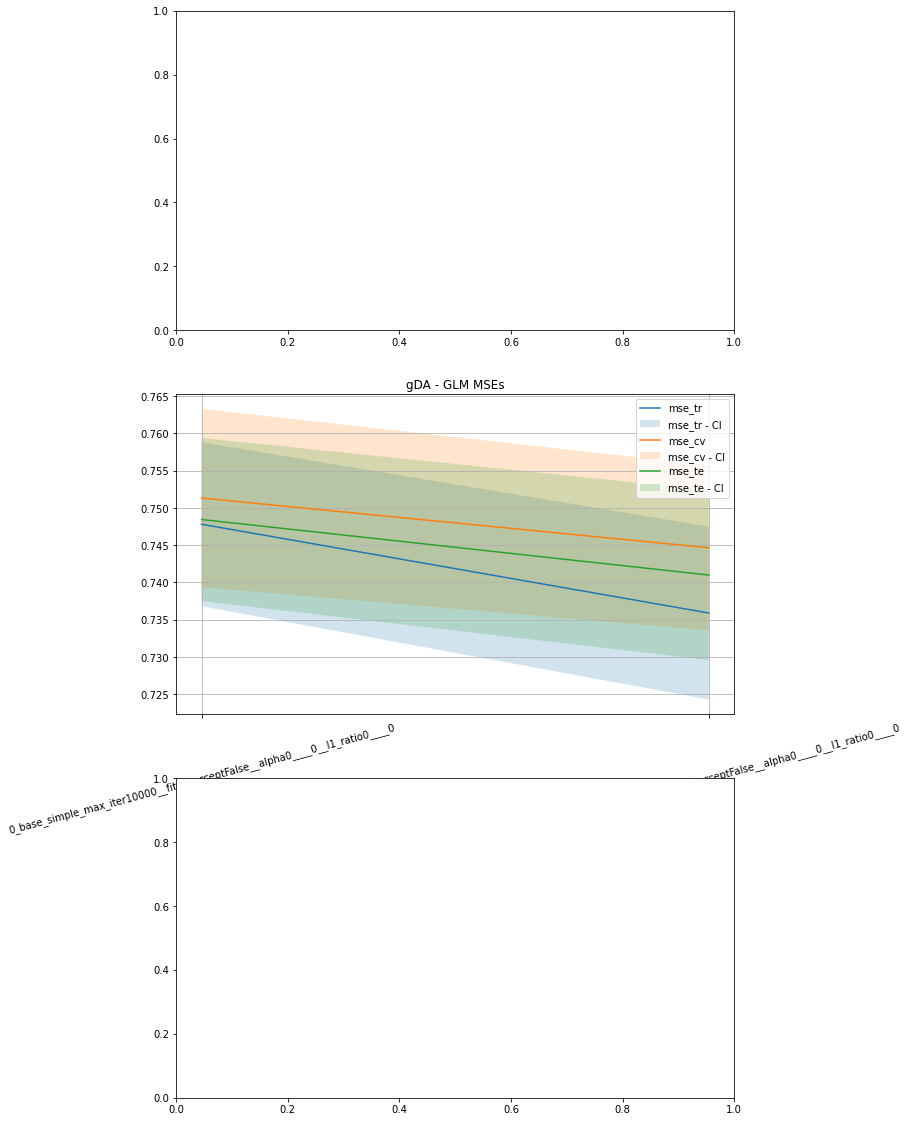

In [21]:
rot = 15

fig,axes=plt.subplots(3,1,figsize=(10,20))
fig.set_facecolor('w')

if len(gACH) > 0:
    ax = axes[0]
    ax.plot(gACH.index, gACH['01_mse_tr']['mn'], label='mse_tr')
    ax.fill_between(gACH.index, gACH['01_mse_tr']['lb'], gACH['01_mse_tr']['ub'], alpha=0.2, label='mse_tr - CI')
    ax.plot(gACH.index, gACH['02_mse_cv']['mn'], label='mse_cv')
    ax.fill_between(gACH.index, gACH['02_mse_cv']['lb'], gACH['02_mse_cv']['ub'], alpha=0.2, label='mse_cv - CI')
    ax.plot(gACH.index, gACH['03_mse_te']['mn'], label='mse_te')
    ax.fill_between(gACH.index, gACH['03_mse_te']['lb'], gACH['03_mse_te']['ub'], alpha=0.2, label='mse_te - CI')
    print([_.get_text() for _ in ax.xaxis.get_ticklabels()])
    ax.set_title('gACH - GLM MSEs')
    ax.legend()
    ax.grid(True)
    for tick in ax.get_xticklabels():
        tick.set_rotation(rot)

if len(gDA) > 0:
    ax = axes[1]
    ax.plot(gDA.index, gDA['01_mse_tr']['mn'], label='mse_tr')
    ax.fill_between(gDA.index, gDA['01_mse_tr']['lb'], gDA['01_mse_tr']['ub'], alpha=0.2, label='mse_tr - CI')
    ax.plot(gDA.index, gDA['02_mse_cv']['mn'], label='mse_cv')
    ax.fill_between(gDA.index, gDA['02_mse_cv']['lb'], gDA['02_mse_cv']['ub'], alpha=0.2, label='mse_cv - CI')
    ax.plot(gDA.index, gDA['03_mse_te']['mn'], label='mse_te')
    ax.fill_between(gDA.index, gDA['03_mse_te']['lb'], gDA['03_mse_te']['ub'], alpha=0.2, label='mse_te - CI')
    ax.set_title('gDA - GLM MSEs')
    ax.legend()
    ax.grid(True)
    for tick in ax.get_xticklabels():
        tick.set_rotation(rot)

if len(rDA) > 0:
    ax = axes[2]
    ax.plot(rDA.index, rDA['01_mse_tr']['mn'], label='mse_tr')
    ax.fill_between(rDA.index, rDA['01_mse_tr']['lb'], rDA['01_mse_tr']['ub'], alpha=0.2, label='mse_tr - CI')
    ax.plot(rDA.index, rDA['02_mse_cv']['mn'], label='mse_cv')
    ax.fill_between(rDA.index, rDA['02_mse_cv']['lb'], rDA['02_mse_cv']['ub'], alpha=0.2, label='mse_cv - CI')
    ax.plot(rDA.index, rDA['03_mse_te']['mn'], label='mse_te')
    ax.fill_between(rDA.index, rDA['03_mse_te']['lb'], rDA['03_mse_te']['ub'], alpha=0.2, label='mse_te - CI')
    ax.set_title('rDA - GLM MSEs')
    ax.legend()
    ax.grid(True)

    for tick in ax.get_xticklabels():
        tick.set_rotation(rot)

plt.show()


In [22]:
print('Done.')

Done.
